## Experiment : Running Gradient Boosting for the raw data 
- Run 4 different Gradient Boosting models, CatBoost, XGBoost, LightGBM and HistGradientBoosting, for DATA_Texas_District_v3.csv specifying the indices of categorical features for models to handle them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import warnings 
# warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [3]:
cols_drop=['County #', 'District #', 'm_all_d_g3_2019', 'm_ethh_d_g3_2019', 'm_etha_d_g3_2019', 'm_ethb_d_g3_2019', 'm_ethw_d_g3_2019', 'm_ecoy_d_g3_2019', 'm_eco1_d_g3_2019', 'm_ti1y_d_g3_2019', 'm_spey_d_g3_2019', 'm_all_d_g4_2019', 'm_ethh_d_g4_2019', 'm_etha_d_g4_2019', 'm_ethb_d_g4_2019', 'm_ethw_d_g4_2019', 'm_ecoy_d_g4_2019', 'm_eco1_d_g4_2019', 'm_ti1y_d_g4_2019', 'm_spey_d_g4_2019', 'm_all_d_g5_2019', 'm_ethh_d_g5_2019', 'm_etha_d_g5_2019', 'm_ethb_d_g5_2019', 'm_ethw_d_g5_2019', 'm_ecoy_d_g5_2019', 'm_eco1_d_g5_2019', 'm_ti1y_d_g5_2019', 'm_spey_d_g5_2019', 'm_all_d_g6_2019', 'm_ethh_d_g6_2019', 'm_etha_d_g6_2019', 'm_ethb_d_g6_2019', 'm_ethw_d_g6_2019', 'm_ecoy_d_g6_2019', 'm_eco1_d_g6_2019', 'm_ti1y_d_g6_2019', 'm_spey_d_g6_2019', 'm_all_d_g7_2019', 'm_ethh_d_g7_2019', 'm_etha_d_g7_2019', 'm_ethb_d_g7_2019', 'm_ethw_d_g7_2019', 'm_ecoy_d_g7_2019', 'm_eco1_d_g7_2019', 'm_ti1y_d_g7_2019', 'm_spey_d_g7_2019', 'm_all_d_g8_2019', 'm_ethh_d_g8_2019', 'm_etha_d_g8_2019', 'm_ethb_d_g8_2019', 'm_ethw_d_g8_2019', 'm_ecoy_d_g8_2019', 'm_eco1_d_g8_2019', 'm_ti1y_d_g8_2019', 'm_spey_d_g8_2019', 'm_all_d_g3_2021', 'm_ethh_d_g3_2021', 'm_etha_d_g3_2021', 'm_ethb_d_g3_2021', 'm_ethw_d_g3_2021', 'm_ecoy_d_g3_2021', 'm_eco1_d_g3_2021', 'm_ti1y_d_g3_2021', 'm_spey_d_g3_2021', 'm_all_d_g4_2021', 'm_ethh_d_g4_2021', 'm_etha_d_g4_2021', 'm_ethb_d_g4_2021', 'm_ethw_d_g4_2021', 'm_ecoy_d_g4_2021', 'm_eco1_d_g4_2021', 'm_ti1y_d_g4_2021', 'm_spey_d_g4_2021', 'm_all_d_g5_2021', 'm_ethh_d_g5_2021', 'm_etha_d_g5_2021', 'm_ethb_d_g5_2021', 'm_ethw_d_g5_2021', 'm_ecoy_d_g5_2021', 'm_eco1_d_g5_2021', 'm_ti1y_d_g5_2021', 'm_spey_d_g5_2021', 'm_all_d_g6_2021', 'm_ethh_d_g6_2021', 'm_etha_d_g6_2021', 'm_ethb_d_g6_2021', 'm_ethw_d_g6_2021', 'm_ecoy_d_g6_2021', 'm_eco1_d_g6_2021', 'm_ti1y_d_g6_2021', 'm_spey_d_g6_2021', 'm_all_d_g7_2021', 'm_ethh_d_g7_2021', 'm_etha_d_g7_2021', 'm_ethb_d_g7_2021', 'm_ethw_d_g7_2021', 'm_ecoy_d_g7_2021', 'm_eco1_d_g7_2021', 'm_ti1y_d_g7_2021', 'm_spey_d_g7_2021', 'm_all_d_g8_2021', 'm_ethh_d_g8_2021', 'm_etha_d_g8_2021', 'm_ethb_d_g8_2021', 'm_ethw_d_g8_2021', 'm_ecoy_d_g8_2021', 'm_eco1_d_g8_2021', 'm_ti1y_d_g8_2021', 'm_spey_d_g8_2021', 'Average Score Math Hispanic Grade 3 2018-2019', 'Average Score Math Asian Grade 3 2018-2019', 'Average Score Math Black Grade 3 2018-2019', 'Average Score Math White Grade 3 2018-2019', 'Average Score Math Poverty Grade 3 2018-2019', 'Average Score Math Free Lunch Grade 3 2018-2019', 'Average Score Math T1 Grade 3 2018-2019', 'Average Score Math Special Ed Grade 3 2018-2019', 'Average Score Math Hispanic Grade 4 2018-2019', 'Average Score Math Asian Grade 4 2018-2019', 'Average Score Math Black Grade 4 2018-2019', 'Average Score Math White Grade 4 2018-2019', 'Average Score Math Poverty Grade 4 2018-2019', 'Average Score Math Free Lunch Grade 4 2018-2019', 'Average Score Math T1 Grade 4 2018-2019', 'Average Score Math Special Ed Grade 4 2018-2019', 'Average Score Math Hispanic Grade 5 2018-2019', 'Average Score Math Asian Grade 5 2018-2019', 'Average Score Math Black Grade 5 2018-2019', 'Average Score Math White Grade 5 2018-2019', 'Average Score Math Poverty Grade 5 2018-2019', 'Average Score Math Free Lunch Grade 5 2018-2019', 'Average Score Math T1 Grade 5 2018-2019', 'Average Score Math Special Ed Grade 5 2018-2019', 'Average Score Math Hispanic Grade 6 2018-2019', 'Average Score Math Asian Grade 6 2018-2019', 'Average Score Math Black Grade 6 2018-2019', 'Average Score Math White Grade 6 2018-2019', 'Average Score Math Poverty Grade 6 2018-2019', 'Average Score Math Free Lunch Grade 6 2018-2019', 'Average Score Math T1 Grade 6 2018-2019', 'Average Score Math Special Ed Grade 6 2018-2019', 'Average Score Math Hispanic Grade 7 2018-2019', 'Average Score Math Asian Grade 7 2018-2019', 'Average Score Math Black Grade 7 2018-2019', 'Average Score Math White Grade 7 2018-2019', 'Average Score Math Poverty Grade 7 2018-2019', 'Average Score Math Free Lunch Grade 7 2018-2019', 'Average Score Math T1 Grade 7 2018-2019', 'Average Score Math Special Ed Grade 7 2018-2019', 'Average Score Math Hispanic Grade 8 2018-2019', 'Average Score Math Asian Grade 8 2018-2019', 'Average Score Math Black Grade 8 2018-2019', 'Average Score Math White Grade 8 2018-2019', 'Average Score Math Poverty Grade 8 2018-2019', 'Average Score Math Free Lunch Grade 8 2018-2019', 'Average Score Math T1 Grade 8 2018-2019', 'Average Score Math Special Ed Grade 8 2018-2019', 'Average Score Math Hispanic Grade 3 2020-2021', 'Average Score Math Asian Grade 3 2020-2021', 'Average Score Math Black Grade 3 2020-2021', 'Average Score Math White Grade 3 2020-2021', 'Average Score Math Poverty Grade 3 2020-2021', 'Average Score Math Free Lunch Grade 3 2020-2021', 'Average Score Math T1 Grade 3 2020-2021', 'Average Score Math Special Ed Grade 3 2020-2021', 'Average Score Math Hispanic Grade 4 2020-2021', 'Average Score Math Asian Grade 4 2020-2021', 'Average Score Math Black Grade 4 2020-2021', 'Average Score Math White Grade 4 2020-2021', 'Average Score Math Poverty Grade 4 2020-2021', 'Average Score Math Free Lunch Grade 4 2020-2021', 'Average Score Math T1 Grade 4 2020-2021', 'Average Score Math Special Ed Grade 4 2020-2021', 'Average Score Math Hispanic Grade 5 2020-2021', 'Average Score Math Asian Grade 5 2020-2021', 'Average Score Math Black Grade 5 2020-2021', 'Average Score Math White Grade 5 2020-2021', 'Average Score Math Poverty Grade 5 2020-2021', 'Average Score Math Free Lunch Grade 5 2020-2021', 'Average Score Math T1 Grade 5 2020-2021', 'Average Score Math Special Ed Grade 5 2020-2021', 'Average Score Math Hispanic Grade 6 2020-2021', 'Average Score Math Asian Grade 6 2020-2021', 'Average Score Math Black Grade 6 2020-2021', 'Average Score Math White Grade 6 2020-2021', 'Average Score Math Poverty Grade 6 2020-2021', 'Average Score Math Free Lunch Grade 6 2020-2021', 'Average Score Math T1 Grade 6 2020-2021', 'Average Score Math Special Ed Grade 6 2020-2021', 'Average Score Math Hispanic Grade 7 2020-2021', 'Average Score Math Asian Grade 7 2020-2021', 'Average Score Math Black Grade 7 2020-2021', 'Average Score Math White Grade 7 2020-2021', 'Average Score Math Poverty Grade 7 2020-2021', 'Average Score Math Free Lunch Grade 7 2020-2021', 'Average Score Math T1 Grade 7 2020-2021', 'Average Score Math Special Ed Grade 7 2020-2021', 'Average Score Math Hispanic Grade 8 2020-2021', 'Average Score Math Asian Grade 8 2020-2021', 'Average Score Math Black Grade 8 2020-2021', 'Average Score Math White Grade 8 2020-2021', 'Average Score Math Poverty Grade 8 2020-2021', 'Average Score Math Free Lunch Grade 8 2020-2021', 'Average Score Math T1 Grade 8 2020-2021', 'Average Score Math Special Ed Grade 8 2020-2021']

cols_imp=['Average Score Reading Hispanic Grade 3 2018-2019', 'Average Score Reading Asian Grade 3 2018-2019', 'Average Score Reading Black Grade 3 2018-2019', 'Average Score Reading White Grade 3 2018-2019', 'Average Score Reading Poverty Grade 3 2018-2019', 'Average Score Reading Free Lunch Grade 3 2018-2019', 'Average Score Reading T1 Grade 3 2018-2019', 'Average Score Reading Special Ed Grade 3 2018-2019', 'Average Score Reading Hispanic Grade 4 2018-2019', 'Average Score Reading Asian Grade 4 2018-2019', 'Average Score Reading Black Grade 4 2018-2019', 'Average Score Reading White Grade 4 2018-2019', 'Average Score Reading Poverty Grade 4 2018-2019', 'Average Score Reading Free Lunch Grade 4 2018-2019', 'Average Score Reading T1 Grade 4 2018-2019', 'Average Score Reading Special Ed Grade 4 2018-2019', 'Average Score Reading Hispanic Grade 5 2018-2019', 'Average Score Reading Asian Grade 5 2018-2019', 'Average Score Reading Black Grade 5 2018-2019', 'Average Score Reading White Grade 5 2018-2019', 'Average Score Reading Poverty Grade 5 2018-2019', 'Average Score Reading Free Lunch Grade 5 2018-2019', 'Average Score Reading T1 Grade 5 2018-2019', 'Average Score Reading Special Ed Grade 5 2018-2019', 'Average Score Reading Hispanic Grade 6 2018-2019', 'Average Score Reading Asian Grade 6 2018-2019', 'Average Score Reading Black Grade 6 2018-2019', 'Average Score Reading White Grade 6 2018-2019', 'Average Score Reading Poverty Grade 6 2018-2019', 'Average Score Reading Free Lunch Grade 6 2018-2019', 'Average Score Reading T1 Grade 6 2018-2019', 'Average Score Reading Special Ed Grade 6 2018-2019', 'Average Score Reading Hispanic Grade 7 2018-2019', 'Average Score Reading Asian Grade 7 2018-2019', 'Average Score Reading Black Grade 7 2018-2019', 'Average Score Reading White Grade 7 2018-2019', 'Average Score Reading Poverty Grade 7 2018-2019', 'Average Score Reading Free Lunch Grade 7 2018-2019', 'Average Score Reading T1 Grade 7 2018-2019', 'Average Score Reading Special Ed Grade 7 2018-2019', 'Average Score Reading Hispanic Grade 8 2018-2019', 'Average Score Reading Asian Grade 8 2018-2019', 'Average Score Reading Black Grade 8 2018-2019', 'Average Score Reading White Grade 8 2018-2019', 'Average Score Reading Poverty Grade 8 2018-2019', 'Average Score Reading Free Lunch Grade 8 2018-2019', 'Average Score Reading T1 Grade 8 2018-2019', 'Average Score Reading Special Ed Grade 8 2018-2019', 'Average Score Reading Hispanic Grade 3 2020-2021', 'Average Score Reading Asian Grade 3 2020-2021', 'Average Score Reading Black Grade 3 2020-2021', 'Average Score Reading White Grade 3 2020-2021', 'Average Score Reading Poverty Grade 3 2020-2021', 'Average Score Reading Free Lunch Grade 3 2020-2021', 'Average Score Reading T1 Grade 3 2020-2021', 'Average Score Reading Special Ed Grade 3 2020-2021', 'Average Score Reading Hispanic Grade 4 2020-2021', 'Average Score Reading Asian Grade 4 2020-2021', 'Average Score Reading Black Grade 4 2020-2021', 'Average Score Reading White Grade 4 2020-2021', 'Average Score Reading Poverty Grade 4 2020-2021', 'Average Score Reading Free Lunch Grade 4 2020-2021', 'Average Score Reading T1 Grade 4 2020-2021', 'Average Score Reading Special Ed Grade 4 2020-2021', 'Average Score Reading Hispanic Grade 5 2020-2021', 'Average Score Reading Asian Grade 5 2020-2021', 'Average Score Reading Black Grade 5 2020-2021', 'Average Score Reading White Grade 5 2020-2021', 'Average Score Reading Poverty Grade 5 2020-2021', 'Average Score Reading Free Lunch Grade 5 2020-2021', 'Average Score Reading T1 Grade 5 2020-2021', 'Average Score Reading Special Ed Grade 5 2020-2021', 'Average Score Reading Hispanic Grade 6 2020-2021', 'Average Score Reading Asian Grade 6 2020-2021', 'Average Score Reading Black Grade 6 2020-2021', 'Average Score Reading White Grade 6 2020-2021', 'Average Score Reading Poverty Grade 6 2020-2021', 'Average Score Reading Free Lunch Grade 6 2020-2021', 'Average Score Reading T1 Grade 6 2020-2021', 'Average Score Reading Special Ed Grade 6 2020-2021', 'Average Score Reading Hispanic Grade 7 2020-2021', 'Average Score Reading Asian Grade 7 2020-2021', 'Average Score Reading Black Grade 7 2020-2021', 'Average Score Reading White Grade 7 2020-2021', 'Average Score Reading Poverty Grade 7 2020-2021', 'Average Score Reading Free Lunch Grade 7 2020-2021', 'Average Score Reading T1 Grade 7 2020-2021', 'Average Score Reading Special Ed Grade 7 2020-2021', 'Average Score Reading Hispanic Grade 8 2020-2021', 'Average Score Reading Asian Grade 8 2020-2021', 'Average Score Reading Black Grade 8 2020-2021', 'Average Score Reading White Grade 8 2020-2021', 'Average Score Reading Poverty Grade 8 2020-2021', 'Average Score Reading Free Lunch Grade 8 2020-2021', 'Average Score Reading T1 Grade 8 2020-2021', 'Average Score Reading Special Ed Grade 8 2020-2021', 'Total Operational Public Schools 2018-2019', 'Total Public Schools 2018-2019', 'Total Students 2018-2019', 'FTE Teachers 2018-2019', 'Total Staff 2018-2019', 'Total Operational Public Schools 2020-2021', 'Total Public Schools 2020-2021', 'Total Students 2020-2021', 'FTE Teachers 2020-2021', 'Total Staff 2020-2021', 'Grades 1-8 2020-2021', 'Grades 1-8 2018-2019', 'Grades 9-12 2020-2021', 'Grades 9-12 2018-2019', 'Prek 2020-2021', 'Prek 2018-2019', 'K 2020-2021', 'K 2018-2019', 'r_all_d_g3_2019', 'r_ethh_d_g3_2019', 'r_etha_d_g3_2019', 'r_ethb_d_g3_2019', 'r_ethw_d_g3_2019', 'r_ecoy_d_g3_2019', 'r_eco1_d_g3_2019', 'r_ti1y_d_g3_2019', 'r_spey_d_g3_2019', 'r_all_d_g4_2019', 'r_ethh_d_g4_2019', 'r_etha_d_g4_2019', 'r_ethb_d_g4_2019', 'r_ethw_d_g4_2019', 'r_ecoy_d_g4_2019', 'r_eco1_d_g4_2019', 'r_ti1y_d_g4_2019', 'r_spey_d_g4_2019', 'r_all_d_g5_2019', 'r_ethh_d_g5_2019', 'r_etha_d_g5_2019', 'r_ethb_d_g5_2019', 'r_ethw_d_g5_2019', 'r_ecoy_d_g5_2019', 'r_eco1_d_g5_2019', 'r_ti1y_d_g5_2019', 'r_spey_d_g5_2019', 'r_all_d_g6_2019', 'r_ethh_d_g6_2019', 'r_etha_d_g6_2019', 'r_ethb_d_g6_2019', 'r_ethw_d_g6_2019', 'r_ecoy_d_g6_2019', 'r_eco1_d_g6_2019', 'r_ti1y_d_g6_2019', 'r_spey_d_g6_2019', 'r_all_d_g7_2019', 'r_ethh_d_g7_2019', 'r_etha_d_g7_2019', 'r_ethb_d_g7_2019', 'r_ethw_d_g7_2019', 'r_ecoy_d_g7_2019', 'r_eco1_d_g7_2019', 'r_ti1y_d_g7_2019', 'r_spey_d_g7_2019', 'r_all_d_g8_2019', 'r_ethh_d_g8_2019', 'r_etha_d_g8_2019', 'r_ethb_d_g8_2019', 'r_ethw_d_g8_2019', 'r_ecoy_d_g8_2019', 'r_eco1_d_g8_2019', 'r_ti1y_d_g8_2019', 'r_spey_d_g8_2019', 'r_all_d_g3_2021', 'r_ethh_d_g3_2021', 'r_etha_d_g3_2021', 'r_ethb_d_g3_2021', 'r_ethw_d_g3_2021', 'r_ecoy_d_g3_2021', 'r_eco1_d_g3_2021', 'r_ti1y_d_g3_2021', 'r_spey_d_g3_2021', 'r_all_d_g4_2021', 'r_ethh_d_g4_2021', 'r_etha_d_g4_2021', 'r_ethb_d_g4_2021', 'r_ethw_d_g4_2021', 'r_ecoy_d_g4_2021', 'r_eco1_d_g4_2021', 'r_ti1y_d_g4_2021', 'r_spey_d_g4_2021', 'r_all_d_g5_2021', 'r_ethh_d_g5_2021', 'r_etha_d_g5_2021', 'r_ethb_d_g5_2021', 'r_ethw_d_g5_2021', 'r_ecoy_d_g5_2021', 'r_eco1_d_g5_2021', 'r_ti1y_d_g5_2021', 'r_spey_d_g5_2021', 'r_all_d_g6_2021', 'r_ethh_d_g6_2021', 'r_etha_d_g6_2021', 'r_ethb_d_g6_2021', 'r_ethw_d_g6_2021', 'r_ecoy_d_g6_2021', 'r_eco1_d_g6_2021', 'r_ti1y_d_g6_2021', 'r_spey_d_g6_2021', 'r_all_d_g7_2021', 'r_ethh_d_g7_2021', 'r_etha_d_g7_2021', 'r_ethb_d_g7_2021', 'r_ethw_d_g7_2021', 'r_ecoy_d_g7_2021', 'r_eco1_d_g7_2021', 'r_ti1y_d_g7_2021', 'r_spey_d_g7_2021', 'r_all_d_g8_2021', 'r_ethh_d_g8_2021', 'r_etha_d_g8_2021', 'r_ethb_d_g8_2021', 'r_ethw_d_g8_2021', 'r_ecoy_d_g8_2021', 'r_eco1_d_g8_2021', 'r_ti1y_d_g8_2021', 'r_spey_d_g8_2021', 'District Enrollment 09/28/20', 'Approx. District On-Campus Enrollment 09/28/20']

### Prepare data ###

Loading the data cleaned from [Data_Integration.ipynb](../processing/Data_Integration.ipynb)

In [5]:
df = pd.read_csv('../processing/DATA_Texas_District_v3.csv', sep=',', header=0)
print('Shape before dropping math columns:',df.shape)
df.drop(columns=cols_drop, inplace=True)
print('Shape after dropping math columns:',df.shape)

Shape before dropping math columns: (1165, 511)
Shape after dropping math columns: (1165, 305)


Make values for label as a postive integer as some models cannot process negative class

In [6]:
df['Label'] = df['Label_Reading'].apply(lambda x: 0 if x == -1
                                                 else 1 if x == 0
                                                 else 2)

**Encoding**

Experimenting grandient boosting models for data with missing values:

- **0**: no imputing, missing values are np.nan  
- **1**: impute for missing values

In [7]:
def encoding (df, ver):
    
    # convert only categorical feature 'Locale' into integer values
    categorical_cols = ['Locale']
    df['Locale']=df['Locale'].apply(lambda x: int(x[:2]))

    if ver == 0: return df, categorical_cols

    imp_avg = SimpleImputer(missing_values=np.nan, strategy='mean')

    df[cols_imp] = imp_avg.fit_transform(df[cols_imp]) 
    
    return df, categorical_cols

**Split data**

In [8]:
random_state=123

In [9]:
def split_data (df):
    labels = ['Label_Math', 'Label_Reading', 'Label_All']

    y = df['Label'].values.ravel()
    X = df.drop(columns=labels + ['Label'])
    columns = df.drop(columns=labels + ['Label']).columns.to_list()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, columns

**n iteration for models**

In [10]:
def get_n_iter (param_grid):
    n_iter_ratio = 0.2
    n_iter = 1
    for v in param_grid.values(): n_iter*=len(v)
    n_iter *= n_iter_ratio

    return int(n_iter)

### Modeling

In [11]:
encoding_type=['No Impute', 'Impute']
rounds = 20

In [12]:
def model_report(estimator, param_grid, fit_params, name):
    result = pd.DataFrame()
    avg = 'weighted'
    cv=5

    n_iter=get_n_iter(param_grid)
    print('{} n_iter: {:0.0f}'.format(name, n_iter))
    if name == 'CatBoost': n_iter=100
    
    for enc_ver in range(len(encoding_type)):
        df_copy, categorical_cols = encoding(df.copy(), enc_ver)
        X_train, X_test, y_train, y_test, columns = split_data(df_copy) 
        
        categorical_cols_idx = [columns.index(c) for c in categorical_cols]    

        if len(categorical_cols) > 0:
            if (name == 'LightGBM'): fit_params['categorical_feature']=categorical_cols_idx
            if (name == 'CatBoost'): fit_params['cat_features']=categorical_cols_idx
            if (name == 'HistGB'): estimator.set_params(**{'categorical_features': categorical_cols_idx})
            if (name == 'XGBoost'):
                X_train=pd.concat([X_train[c].astype('category') if c in categorical_cols else X_train[c] for c in X_train.columns], axis=1)
                X_test=pd.concat([X_test[c].astype('category') if c in categorical_cols else X_test[c] for c in X_test.columns], axis=1)
        else:
            if (name == 'LightGBM'): fit_params['categorical_feature']=None
            if (name == 'CatBoost'): fit_params['cat_features']=None
            if (name == 'HistGB'): estimator.set_params(**{'categorical_features': None})
        
        grid = RandomizedSearchCV(estimator, param_distributions=param_grid, cv=cv, n_jobs=-1, 
                            random_state=random_state, n_iter=n_iter)

        start_cpu = time.process_time()
        start_wall = time.time()
         
        if name == 'HistGB': 
            grid.fit(X_train, y_train)
        else:
            fit_params['eval_set'] =  [(X_test, y_test)]
            grid.fit(X_train, y_train, **fit_params)
            
        if name == 'XGBoost': grid.best_estimator_.save_model("categorical-model.json") 

        cpu_time = time.process_time() - start_cpu
        wall_time = time.time() - start_wall
        y_pred = grid.best_estimator_.predict(X_test)

        temp = {'Model': name,
                'enc_ver': encoding_type[enc_ver],
                'n features': len(columns),
                'n cat_features': len(categorical_cols),
                'best_params': grid.best_params_,
                'Best Accuracy': grid.best_score_, 
                'Train Accuracy': grid.best_estimator_.score(X_train, y_train),
                'Test Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average=avg),
                'Recall': recall_score(y_test, y_pred, average=avg),
                'MCC': matthews_corrcoef(y_test, y_pred), 
                'F1': f1_score(y_test, y_pred, average=avg),
    #                 'ROC': roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr', average=avg),
                'conf_mat': confusion_matrix(y_test, y_pred), 
                'Prediction': y_pred,
                'predict_proba': grid.best_estimator_.predict_proba(X_test),
    #             'Features': features,
                'estimator': grid.best_estimator_,
                'classification_report': classification_report(y_test, y_pred),
                'Train Time CPU': cpu_time,
                'Train Time Wall': wall_time,
                'n_iter': n_iter}
        result = pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

In [13]:
results = pd.DataFrame()

**CatBoost**

In [14]:
%%time
from catboost import CatBoostClassifier

params = {'iterations': [50, 100, 200],
'depth': [3, 6, 9],
'min_data_in_leaf': [1, 5, 10],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg': [0, 0.01, 0.1, 1, 10],
'random_strength': [0, 5, 10, 15]}

fit_params = {'early_stopping_rounds': rounds}

estimator = CatBoostClassifier(random_seed=random_state, verbose=False, 
                               loss_function='MultiClass', eval_metric="MultiClass", one_hot_max_size=4, border_count=254)
                           
result_report=model_report(estimator, params, fit_params, 'CatBoost')
results=pd.concat([results, result_report], ignore_index=True)

CatBoost n_iter: 432
CPU times: total: 1min 42s
Wall time: 3h 26min 23s


**XGBoost**

In [15]:
%%time
import xgboost

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, 0],
'min_child_weight': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'alpha': [0,  0.1, 10],
'lambda': [0,  0.1, 10],
'gamma': [0,  0.1, 10]}


estimator = xgboost.XGBClassifier(seed=random_state, objective='multi:softproba', eval_metric='mlogloss', use_label_encoder=False, verbosity=0,
                                  num_class=3, tree_method="hist", early_stopping_rounds=rounds, enable_categorical=True, max_cat_to_onehot=4)


result_report=model_report(estimator, params, {}, 'XGBoost')
results=pd.concat([results, result_report], ignore_index=True)

XGBoost n_iter: 777
[0]	validation_0-mlogloss:1.04201


C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

[1]	validation_0-mlogloss:1.00127
[2]	validation_0-mlogloss:0.97319
[3]	validation_0-mlogloss:0.95520
[4]	validation_0-mlogloss:0.94329
[5]	validation_0-mlogloss:0.93476
[6]	validation_0-mlogloss:0.92311
[7]	validation_0-mlogloss:0.91661
[8]	validation_0-mlogloss:0.91139
[9]	validation_0-mlogloss:0.90543
[10]	validation_0-mlogloss:0.90099
[11]	validation_0-mlogloss:0.89583
[12]	validation_0-mlogloss:0.88789
[13]	validation_0-mlogloss:0.88312
[14]	validation_0-mlogloss:0.88271
[15]	validation_0-mlogloss:0.88290
[16]	validation_0-mlogloss:0.87877
[17]	validation_0-mlogloss:0.87628
[18]	validation_0-mlogloss:0.87163
[19]	validation_0-mlogloss:0.87028
[20]	validation_0-mlogloss:0.86664
[21]	validation_0-mlogloss:0.86581
[22]	validation_0-mlogloss:0.86471
[23]	validation_0-mlogloss:0.86381
[24]	validation_0-mlogloss:0.85969
[25]	validation_0-mlogloss:0.86008
[26]	validation_0-mlogloss:0.85571
[27]	validation_0-mlogloss:0.85393
[28]	validation_0-mlogloss:0.84969
[29]	validation_0-mlogloss:0.

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

[0]	validation_0-mlogloss:1.03106
[1]	validation_0-mlogloss:0.98572
[2]	validation_0-mlogloss:0.94911
[3]	validation_0-mlogloss:0.92556
[4]	validation_0-mlogloss:0.90570
[5]	validation_0-mlogloss:0.88659
[6]	validation_0-mlogloss:0.86861
[7]	validation_0-mlogloss:0.86251
[8]	validation_0-mlogloss:0.84886
[9]	validation_0-mlogloss:0.83459
[10]	validation_0-mlogloss:0.82873
[11]	validation_0-mlogloss:0.82358
[12]	validation_0-mlogloss:0.81689
[13]	validation_0-mlogloss:0.81821
[14]	validation_0-mlogloss:0.81364
[15]	validation_0-mlogloss:0.80825
[16]	validation_0-mlogloss:0.80584
[17]	validation_0-mlogloss:0.79996
[18]	validation_0-mlogloss:0.80143
[19]	validation_0-mlogloss:0.79741
[20]	validation_0-mlogloss:0.79337
[21]	validation_0-mlogloss:0.78656
[22]	validation_0-mlogloss:0.78089
[23]	validation_0-mlogloss:0.78133
[24]	validation_0-mlogloss:0.77736
[25]	validation_0-mlogloss:0.77516
[26]	validation_0-mlogloss:0.77186
[27]	validation_0-mlogloss:0.76965
[28]	validation_0-mlogloss:0.7

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

CPU times: total: 1min 29s
Wall time: 2h 8min 10s


C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = data[data.columns[i]]
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

**LightGBM**

In [16]:
%%time
import lightgbm as lgb

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, -1],
'min_sum_hessian_in_leaf': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'reg_alpha': [0,  0.1, 10],
'reg_lambda': [0,  0.1, 10],
'min_split_gain': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds}

estimator = lgb.LGBMClassifier(random_state=random_state, objective="multiclass", metric="multi_logloss", verbosity=-1, silent=True, force_col_wise=True,
                               num_class=3, is_unbalance=True, max_cat_threshold=32)

result_report=model_report(estimator, params, fit_params, 'LightGBM')
results=pd.concat([results, result_report], ignore_index=True)

LightGBM n_iter: 777


C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [10]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[1]	valid_0's multi_logloss: 0.995282
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.960126
[3]	valid_0's multi_logloss: 0.939828
[4]	valid_0's multi_logloss: 0.925942
[5]	valid_0's multi_logloss: 0.914445
[6]	valid_0's multi_logloss: 0.905063
[7]	valid_0's multi_logloss: 0.898805
[8]	valid_0's multi_logloss: 0.896128
[9]	valid_0's multi_logloss: 0.890165
[10]	valid_0's multi_logloss: 0.885495
[11]	valid_0's multi_logloss: 0.884347
[12]	valid_0's multi_logloss: 0.874647
[13]	valid_0's multi_logloss: 0.866673
[14]	valid_0's multi_logloss: 0.8611
[15]	valid_0's multi_logloss: 0.860584
[16]	valid_0's multi_logloss: 0.85744
[17]	valid_0's multi_logloss: 0.858699
[18]	valid_0's multi_logloss: 0.853822
[19]	valid_0's multi_logloss: 0.856164
[20]	valid_0's multi_logloss: 0.853517
[21]	valid_0's multi_loglos

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [10]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[1]	valid_0's multi_logloss: 0.993072
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.9505
[3]	valid_0's multi_logloss: 0.924515
[4]	valid_0's multi_logloss: 0.895333
[5]	valid_0's multi_logloss: 0.873251
[6]	valid_0's multi_logloss: 0.850531
[7]	valid_0's multi_logloss: 0.839053
[8]	valid_0's multi_logloss: 0.830271
[9]	valid_0's multi_logloss: 0.816071
[10]	valid_0's multi_logloss: 0.805327
[11]	valid_0's multi_logloss: 0.794901
[12]	valid_0's multi_logloss: 0.790615
[13]	valid_0's multi_logloss: 0.784437
[14]	valid_0's multi_logloss: 0.773087
[15]	valid_0's multi_logloss: 0.770815
[16]	valid_0's multi_logloss: 0.769507
[17]	valid_0's multi_logloss: 0.76833
[18]	valid_0's multi_logloss: 0.766988
[19]	valid_0's multi_logloss: 0.760444
[20]	valid_0's multi_logloss: 0.75555
[21]	valid_0's multi_logloss: 0.

**HistGradientBoosting**

In [17]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

params = {'max_iter': [50, 100, 200],
'max_depth': [1, 6, None],
'max_leaf_nodes': [10, 31, 50, 64],
'min_samples_leaf': [10, 20, 30],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_regularization': [0, 0.01, 0.1, 1, 10]}

estimator=HistGradientBoostingClassifier(random_state=random_state, n_iter_no_change=rounds, early_stopping=True)

result_report=model_report(estimator, params, {}, 'HistGB')
results=pd.concat([results, result_report], ignore_index=True)

HistGB n_iter: 432
CPU times: total: 58.5 s
Wall time: 1h 18s


In [18]:
results.to_csv('NA_Modeling_GB_Reading.csv', index=False)

## Result ##

In [19]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)[['Model', 'enc_ver', 'n features', 'n cat_features', 'Test Accuracy', 'Precision', 'Recall', 'MCC', 'F1', 'best_params']]

,Model,enc_ver,n features,n cat_features,Test Accuracy,Precision,Recall,MCC,F1,best_params
6,HistGB,No Impute,302,1,0.686695,0.682091,0.686695,0.490134,0.681834,"{'min_samples_leaf': 30, 'max_leaf_nodes': 31,..."
0,CatBoost,No Impute,302,1,0.686695,0.692910,0.686695,0.482931,0.672207,"{'random_strength': 15, 'min_data_in_leaf': 5,..."
1,CatBoost,Impute,302,1,0.686695,0.694121,0.686695,0.482839,0.673965,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."
7,HistGB,Impute,302,1,0.673820,0.678089,0.673820,0.460185,0.662870,"{'min_samples_leaf': 20, 'max_leaf_nodes': 10,..."
2,XGBoost,No Impute,302,1,0.660944,0.665527,0.660944,0.438613,0.648386,"{'n_estimators': 200, 'min_child_weight': 1, '..."
4,LightGBM,No Impute,302,1,0.648069,0.649145,0.648069,0.417690,0.637787,"{'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estim..."
3,XGBoost,Impute,302,1,0.639485,0.643589,0.639485,0.397601,0.620128,"{'n_estimators': 200, 'min_child_weight': 1, '..."
5,LightGBM,Impute,302,1,0.635193,0.634893,0.635193,0.394402,0.625697,"{'reg_lambda': 10, 'reg_alpha': 0, 'n_estimato..."


**Accuracy, MCC and F1 Score**

In [20]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'enc_ver'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
# results2=results2.astype({'n Selected': 'int32'})

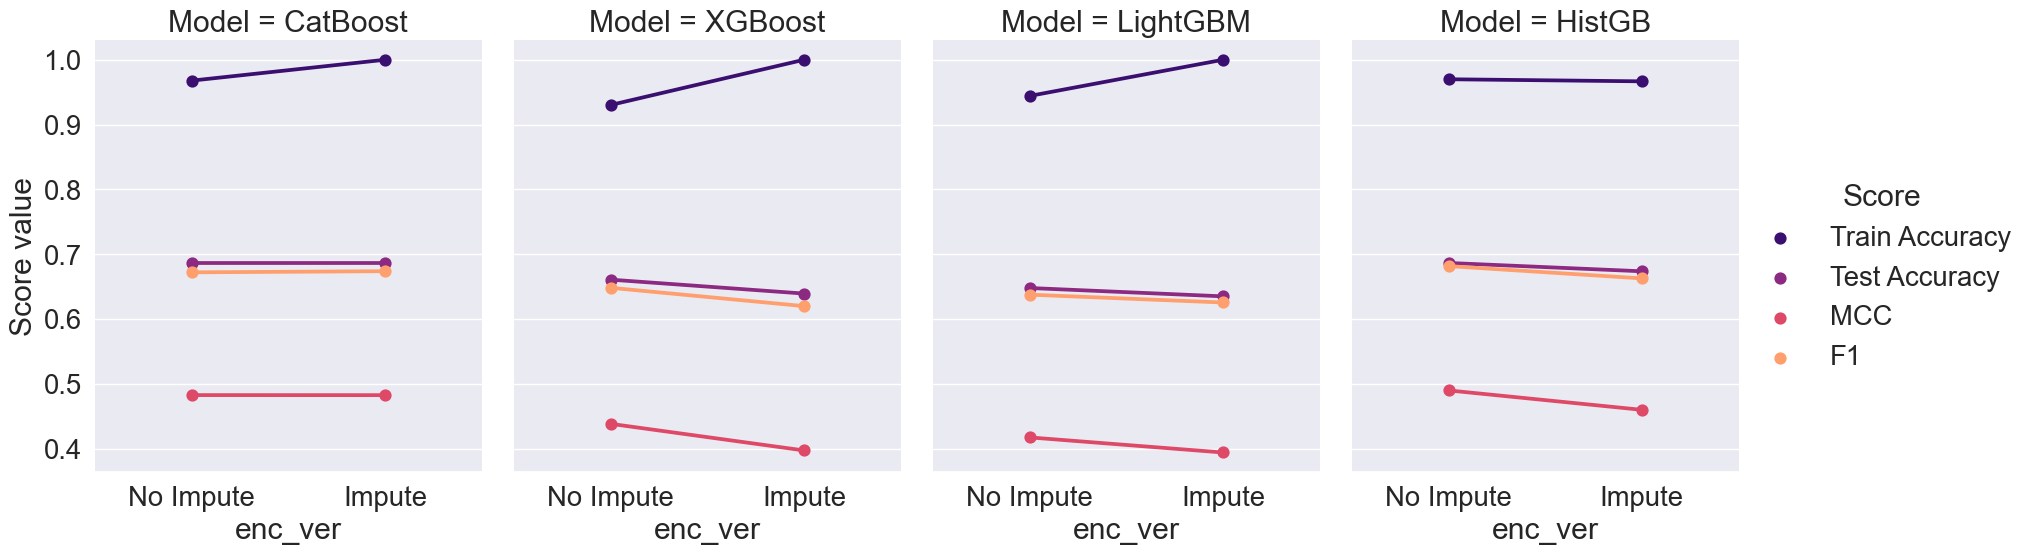

In [21]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="enc_ver", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=.75,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [22]:
models = results['Model'].unique().tolist()
temp=results.sort_values(by=['Model', 'MCC', 'F1'], ascending=False)

n=len(encoding_type)
best_per_model_idx = []
for i in range(len(temp.index)):
    if i % n == 0: best_per_model_idx.append(temp.index[i])

**Confusion Matrix**

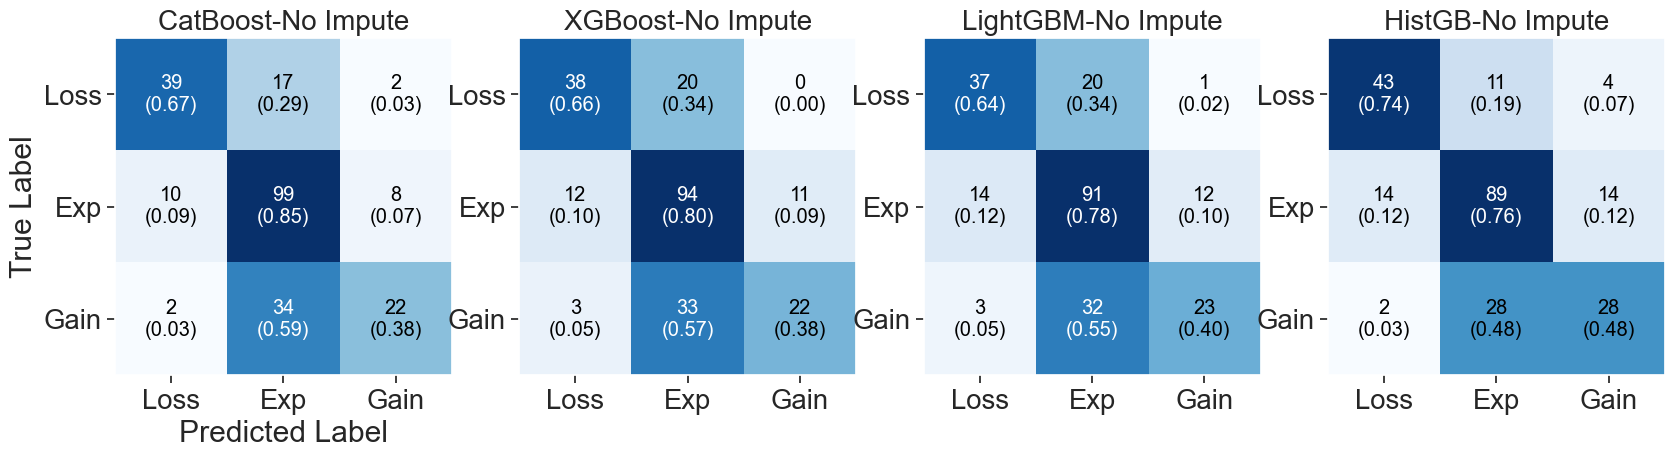

In [23]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

def ticks(x, position):
    if position == 1: return 'Loss'
    if position == 2: return 'Exp'
    if position == 3: return 'Gain'
    
fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'],
                          show_absolute=True, show_normed=True)
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(ticks))
    axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(ticks))
plt.show()

**ROC Curve**

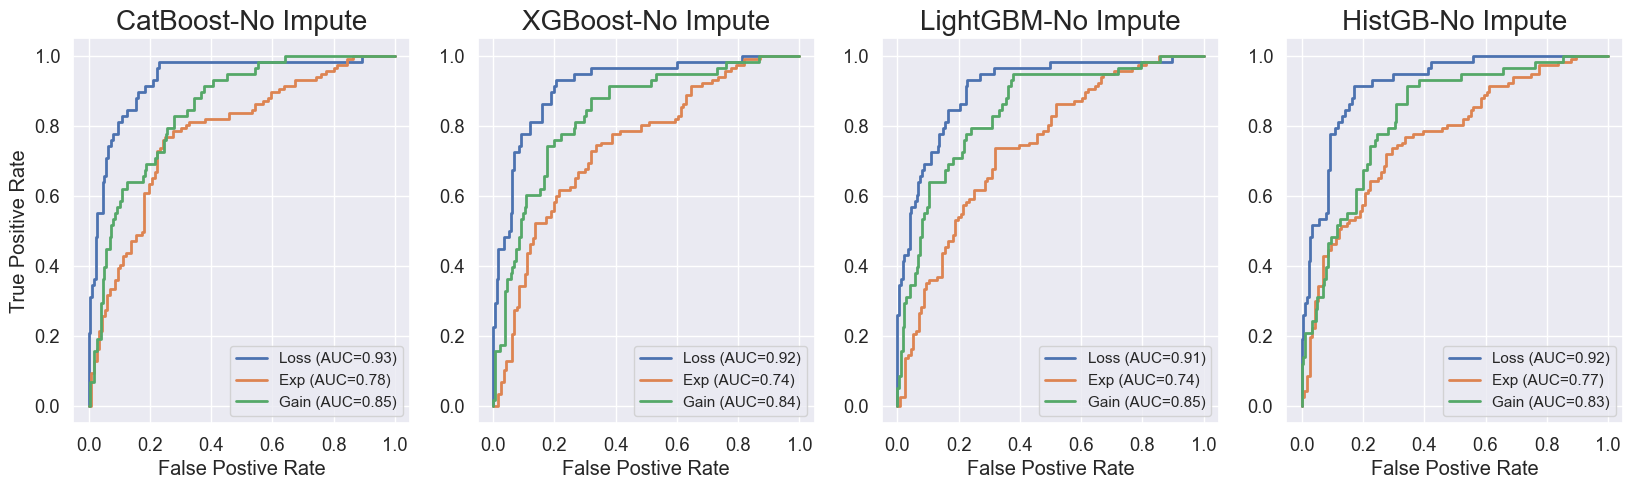

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    fpr, tpr = {}, {}

    for c in classes:
        fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(fpr[c], tpr[c], lw=2, label='{} (AUC={:0.2f})'.format(ticks(c,c+1), auc(fpr[c], tpr[c])))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("False Postive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

plt.show()

**Precision-Recall Curve**

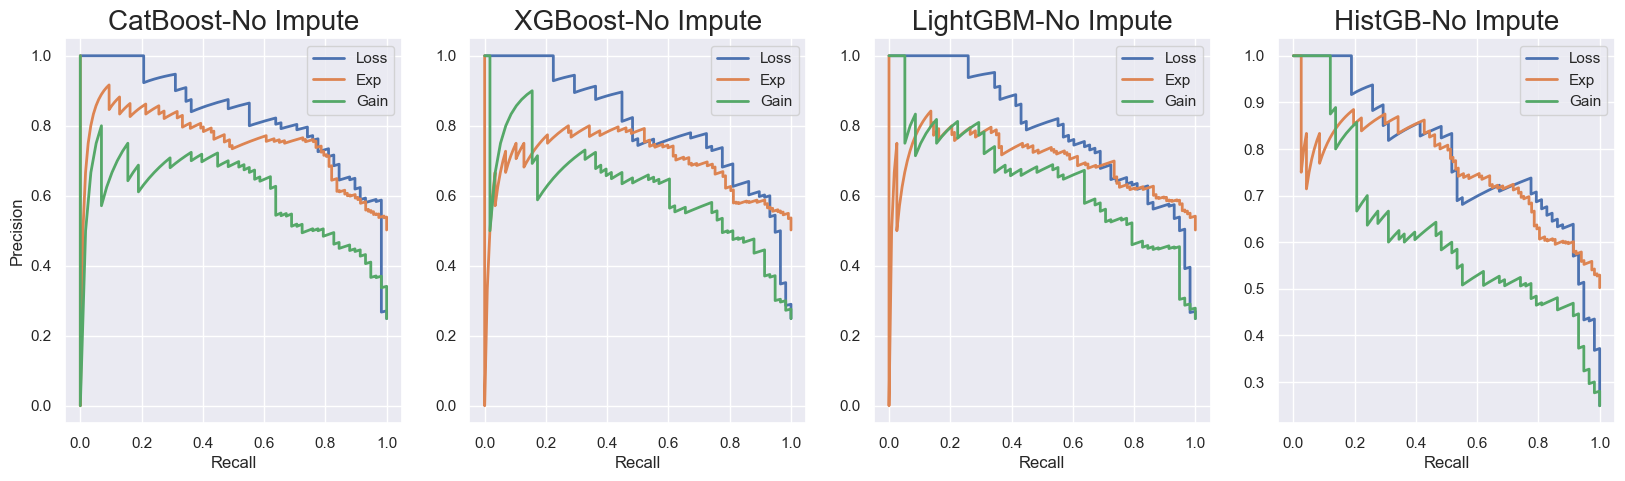

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    prec, rec = {}, {}

    for c in classes:
        prec[c], rec[c], _ = precision_recall_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(rec[c], prec[c], lw=2, label='{}'.format(ticks(c,c+1)))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("Recall")
    axes[0].set_ylabel("Precision")
    axes[i].legend(loc="best")

plt.show()